# Project 7: Predictive Machine Learning Notebook Project
**Author:** Karli Dean\
**Internet Link:** This repository can be found on [GitHub](https://github.com/karlidean/datafun-07-ml).

**About:** In this Jupyter Notebook, we will complete a guided Machine Learning project. This will be utilizing section 10.16 and 15.4 from the textbook. After completion, we will be able to chart straight lines, complete linear regressions in two different ways, and be able to separate our data into training and testing subsets to make sure our models are not overfit for a certain type of data.

## Part 1 - Charting a Straight Line

### Imports We Need

Before we begin, we need to import our necessary packages. This list is culminated over the course of the assignment, just so we can have all imports together.

In [85]:
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from dataclasses import dataclass

### Determining the Variables

Our first step in this project work is to define our variables. These will be Farenheit (f) and Celsius (c). 

In [86]:
# Defining "c" as Celsius, which will be a dependent relationship on our Farenheit table
c = lambda f: 5 / 9 * (f-32)

# Defining temps as coordinates (Farenheit, Celsius)
temps = [(f, c(f)) for f in range(0, 101, 10)]

**Finding 1:** The variable c is an equation using the variable f as Celsius is not defined in our future data set we'll be making the project with, but Farenheit is. This means the variable c is dependent on what the f variable is saying in order to return a value for c.

### Determining DataFrame and Axes for Plots

Next, let's plot the dataframe for these temperatures. We'll put Farenheit on the X axis and Celsius on the Y axis. This dataframe has both Farenheit and Celsius, but our main project without Celsius in the table is coming later.

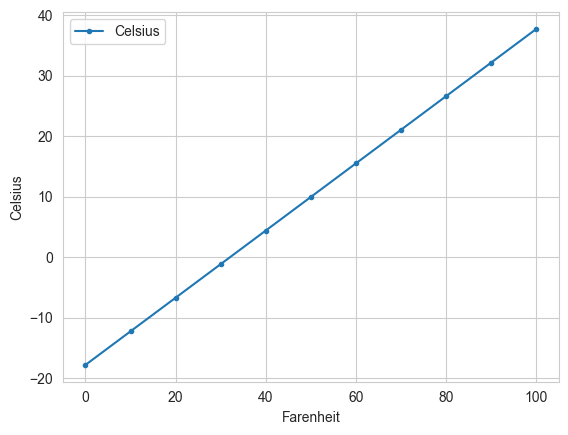

In [87]:
# Determining the temperature data frame
temps_df = pd.DataFrame(temps, columns=['Farenheit', 'Celsius'])

# Determining the axes for the temperature plot
axes = temps_df.plot(x='Farenheit', y='Celsius', style='.-')

# Determining the y axis label (Celsius)
y_label = axes.set_ylabel('Celsius')

**Finding 2:** The Celsius and Farenheit columns in this chart work together to create a straight line. This dataframe returns a straight line as Celsius nor Farenheit temperatures increase or decrease exponentially from each other.

## Part 2 - Prediction

### Data Acquisition

Now, let's build a model using average high temperatures in January in New York City from 1895 to 2018. The next code will implement our dataframe using the `.read_csv` function. This function allows us to make changes to the dataframe while not making changes to the actual CSV.

In [88]:
# Telling our model where to pull from to get the data we want
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Data Inspection

Now, we can look at the head of the dataframe using the `.head()` function.

In [89]:
# Looking at the head function to know what the beginning of the data frame looks like
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


We can also look at the back end of a function using the `.tail()` function.

In [90]:
# Looking at the tail function to know what the end of the data frame looks like
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


**Finding 3:** We can see that there are 3 columns and up to 123 rows of data in this data frame. The column names are Date, Value, and Anomaly.

### Data Cleaning

The first thing we will do to clean our data is change our column names to terms that define the column's data more effectively. We will also run the `.head()` function to check if our changes were made correctly.

In [91]:
# Renaming the columns to be more reflective of what the data is telling us
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [92]:
# Verifying the change was successful
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


**Finding 4:** The changes to the dataframe were successful.

Next, we can see our data types. Let's look at the type of data within the Date column.

In [93]:
nyc.Date.dtype

dtype('int64')

**Finding 5:** This data type is int64. This means there are no floating decimals within any of the numbers in this column. This makes sense because it's a field of years. If there were columns, I'd be more worried!

Let's take a look at the Temperature column to see its type!

In [94]:
nyc.Temperature.dtype

dtype('float64')

**Finding 6:** This is a float64 type, meaning there can be (usually are) decimals within the column's field.

If we haven't noticed yet, our years are 6 digits long, which is more than how we see years today. We can do a floor division, which divides all of the contents of the column by whatever number I specify and replaces the column contents with the result of that. We will run the `.head()` function afterwards to make sure our changes were successful.

In [95]:
# Instead of having a 6 digit year, we are going to make the date a normal (4 digit) year format
nyc.Date = nyc.Date.floordiv(100)

In [96]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


**Finding 7:** Our changes were successful, and our years are now a standard 4 digits.

### Descriptive Statistics

Next, we will be looking at descriptive statistics for our dataframe. First, let's set our dataframe to only go to 2 decimals. This also means integers, like our Date column, will now be followed by ".00".

In [97]:
# Setting our decimal point to only two digits post the decimal.
pd.set_option('display.precision', 2)

# This code was originally pd.set_option('precision', 2) in the textbook, but is not valid in modern pandas anymore.
# I used ChatGPT to understand the function fully and find out how to get this function to do what I want.

We can now acquire our descriptive statistics with the `.describe()` function.

In [98]:
# Calculating basic descriptive statistics for the dataframe
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

**Finding 8:** All of these statistics are now followed by 2 decimal places, regardless of what the original record had in the dataframe. This keeps our data with a float64 type.

### Building the Model

Now is when we would import scipy's stats, if we haven't already. I implemented the package at the top of the Jupyter Notebook, with the other imports I have needed in this notebook. Using stats from scipy, we will use the linear regression function with the name of `stats.linregress()`. We can define our x and y plot variables within this function.

In [99]:
# Creating a linear regression of our temperatures.
# This code will not return anything, but it will run the linear regression.
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

Next, let's find the slope. Using the `.slope` function, we can find the `m` in `y = mx + b`.

In [100]:
# Acquiring the slope of the linear regression we ran in the previous code.
linear_regression.slope
# Our slope is the number in the parentheses!

np.float64(0.014771361132966163)

**Finding 9:** Our slope is 0.014771361132966163, which means every year, the average high temperature in January in New York City is going up by 0.014771361132966163 degrees (in Farenheit).

Next, we will find our y-intercept. This is the `b` in `y = mx + b`. This number should be the average high temperature (in Farenheit) in year 0.

In [101]:
# Acquiring the y-intercept of the linear regression
linear_regression.intercept
# Should be the number in the parentheses

np.float64(8.694993233674289)

**Finding 10:** In January of year 0, in New York City, the average high temperature was 8.694993233674289 degrees Farenheit.

Now that we have our slope and y-intercept, we can plug in our x value for whatever year we want. Let's do one from 2019 (pretty recently) and one from 1890 (long ago).

In [102]:
# Plugging our slope and intercept into the y=mx+b equation
linear_regression.slope * 2019 + linear_regression.intercept
# Finds the point on the line where x = 2019

np.float64(38.51837136113297)

**Finding 11:** The average high temperature in January in New York City in the year 2019 should be around 38.52 degrees Farenheit.

In [103]:
# Plugging our slope and intercept into the y=mx+b equation
linear_regression.slope * 1890 + linear_regression.intercept
# Finds the point on the line where x = 1890

np.float64(36.612865774980335)

**Finding 12:** The average high temperature in January in New York City in the year 1890 should be around 36.61 degrees Farenheit.

### Predict

We've now received outputs in the test phase that make sense with an understanding of the data. Now we can predict our forecast using the same equation. Let's look at 2024 and 2026.

In [104]:
# Plugging our slope and intercept into the y=mx+b equation
# Predicting for the year 2024
linear_regression.slope * 2024 + linear_regression.intercept
# Finds the point on the line where x = 2024

np.float64(38.5922281667978)

**Finding 13:** The average high temperature in January in New York City in the year 2024 should be around 38.59 degrees Farenheit.

In [105]:
# Plugging our slope and intercept into the y=mx+b equation
# Predicting for the year 2026
linear_regression.slope * 2026 + linear_regression.intercept
# Finds the point on the line where x = 2026

np.float64(38.62177088906374)

**Finding 14:** The average high temperature in January in New York City in the year 2026 should be around 38.62 degrees Farenheit.

### Visualizations

We know we have a model that operates correctly. Now we can plot this model to visualize it.

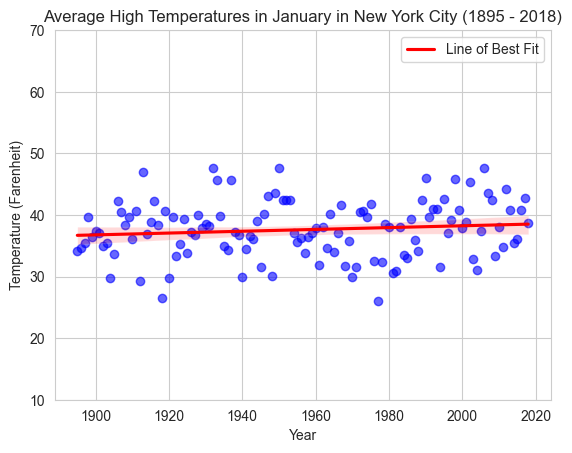

In [106]:
# Settings of our graph (Style)
sns.set_style('whitegrid')

# Settings of our graph (Axes)
axes = sns.regplot(
    x=nyc.Date, 
    y=nyc.Temperature, 
    line_kws={'color': 'red', 'label': 'Line of Best Fit'}, 
    scatter_kws={'alpha': 0.6, 'color': 'blue'} )

# Setting parameters on our y axis
axes.set_ylim(10, 70)

# Setting Axis Names and Titles
axes.set_xlabel('Year')
axes.set_ylabel('Temperature (Farenheit)')
axes.set_title('Average High Temperatures in January in New York City (1895 - 2018)')
axes.legend()

**Finding 15:** This plot is a little different than the book's because I customized it. I made the blue dots darker and more defined and the line of best fit is red. The pink shadow around the line shows a 95% confidence interval that a year's temperature would be close to the line of best fit. Notice how there's lots of variance in this table!

## Part 3 - Prediction

### Build the Model

Now that we've seen the data, we are going to do the exact same thing, but in a different way. In our first prediction model, we used the same data set as our training and testing data. This could put us at risk of overfitting (tailoring the model too closely to the data). Now, we will split our data into training and testing values so we can be at a lower risk of overfitting.

In [107]:
# Splits our nyc dataframe into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)

Now that the data is split, we can see the different shapes of the dataframes using the `.shape` function.

In [108]:
X_train.shape

(93, 1)

In [109]:
X_test.shape

(31, 1)

**Finding 16:** We had the model randomly pick which group the records went into. Remember that theres 124 records in our set, and 124 x-values between the training and testing groups together. We have all of our data!

### Training the Model

We will create a new linear regression model from scikit-learn. This model will be empty, and we will have to train it.

In [110]:
linear_regression = LinearRegression()

We will now implement our training data into the x and y values (X_train and y_train).

In [111]:
linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Finding 17:** We have now trained our model. This now stores all of the y-intercepts and slopes, and training values we used and will need for our machine to learn from itself.

The following code looks very similar to our previous machine learning model. HOWEVER, it is setting up a new linear regression model based on the previous training session, gearing up for us to use our test data.

In [112]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Finding 18:** These parameters should be the same as the previous model's parameters.

Now that we have a model, we can acquire our coefficient (m) and y-intercept (b).

In [113]:
linear_regression.coef_

array([0.01939167])

In [114]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

**Finding 19:** These output values are a little different than the previous model's. Notice how the y-intercept is around 8 degrees different! This could mean that the previous model was too used to the whole data set, and this model shows the overfitting we couldn't see.

### Test the Model

We are now setting up the test data within the model. 

In [115]:
predicted = linear_regression.predict(X_test)

In [116]:
expected = y_test

In [117]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


**Finding 20:** The trained model looks to be much higher in temperature in earlier years, tapering lower than the dataset results for those records. This means that there is more variance in each data set than we thought, and the linear regression is not reflective of the reality in some cases, being off by over 7 degrees sometimes! This could be due to the appearance of outliers. As the training data had almost triple the records, I would trust the system to be reflective, not perfect, of a reality.

### Predict

Now that we have a model, we can predict the values of different years, just like before.

In [118]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [119]:
predict(2019)

array([38.84399018])

In [120]:
predict(1890)

array([36.34246432])

In [121]:
predict(2024)

array([38.94094855])

In [122]:
predict(2026)

array([38.97973189])

**Finding 21:** These values are pretty close to where they lay on the previous model's linear regression. This allows me to believe that our testing data contained many outliers, but the model was still accurate.

### Visualizations

We can now plot our data within a scatterplot graph to see this data in motion.

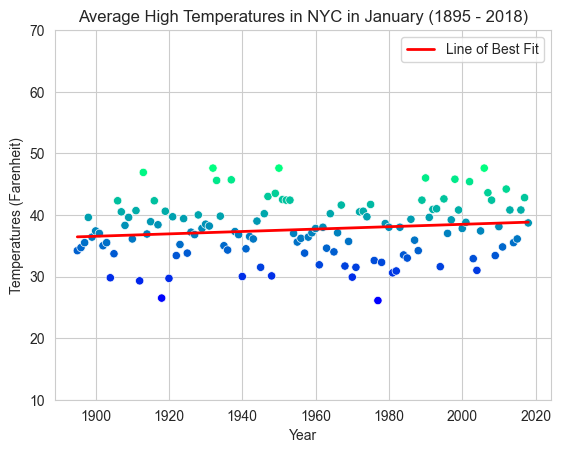

In [123]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', 
hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10,70)

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

line = plt.plot(x, y, color='red', linewidth=2, label='Line of Best Fit')

axes.set_xlabel('Year')
axes.set_ylabel('Temperatures (Farenheit)')
axes.set_title('Average High Temperatures in NYC in January (1895 - 2018)')
axes.legend()

**Finding 22:** This chart shows all of the nyc dataframe again. It should be the same plot as last time, just the coordinates are more green the warmer the temperature is, and purple the cooler the temperature is. The line of best fit should also be very similar to the previous model's graph.

## Part 4 - Insights


## 🆚 Comparison: Full-Data Simple Regression vs. Train/Test Split Sklearn

This section contrasts two approaches **on the same test set (`X_test`, `y_test`)**:
- **Simple (Full Data)**: `scipy.stats.linregress` trained on **all** available rows in `nyc` (uses every year).
- **Sklearn (Split)**: `sklearn.linear_model.LinearRegression` trained **only** on `X_train`, `y_train` from your earlier `train_test_split`.

Because the full-data model has seen *everything*, it will usually score slightly better on the test set.  
This highlights why a proper train/test split is important for honest generalization metrics.


In [124]:

# === Metrics helper (self-contained) ===
def _to_1d(a):
    if hasattr(a, "to_numpy"):
        a = a.to_numpy()
    a = np.asarray(a)
    return a.ravel()

def evaluate_models(models: dict, X_test, y_test, feature_count: int | None = None) -> pd.DataFrame:
    y_true = _to_1d(y_test)
    n = y_true.shape[0]
    try:
        p = feature_count if feature_count is not None else (X_test.shape[1] if np.ndim(X_test) == 2 else 1)
    except Exception:
        p = feature_count if feature_count is not None else None

    rows = []
    for name, model in models.items():
        try:
            y_pred = model.predict(X_test)
        except Exception:
            y_pred = model.predict(np.asarray(X_test))
        y_pred = _to_1d(y_pred)

        m = min(len(y_true), len(y_pred))
        yt = y_true[:m]
        yp = y_pred[:m]

        r2 = r2_score(yt, yp)
        mae = mean_absolute_error(yt, yp)
        mse = mean_squared_error(yt, yp)
        rmse = np.sqrt(mse)

        if np.any(yt == 0):
            smape = np.mean(2.0 * np.abs(yp - yt) / (np.abs(yt) + np.abs(yp) + 1e-12)) * 100
            mape = np.nan
        else:
            mape = mean_absolute_percentage_error(yt, yp) * 100
            smape = np.nan

        if p is not None and n > p + 1:
            adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        else:
            adj_r2 = np.nan

        rows.append({
                "model": name,
                "R2": r2,
                "Adj_R2": adj_r2,
                "MAE": mae,
                "MSE": mse,
                "RMSE": rmse,
                "MAPE_%": mape,
                "sMAPE_%": smape,
                "n": n,
                "p": p
        })

    df = pd.DataFrame(rows).set_index("model").sort_values(by="RMSE")
    display(df.style.format({
        "R2": "{:.4f}", "Adj_R2": "{:.4f}", "MAE": "{:.3f}", "MSE": "{:.3f}", "RMSE": "{:.3f}", "MAPE_%": "{:.2f}", "sMAPE_%": "{:.2f}"
    }))
    return df


In [125]:

# === Train full-data simple model and compare against split-trained sklearn model ===
@dataclass
class SimpleLR:
    slope: float
    intercept: float
    def predict(self, X):
        X = np.asarray(X)
        if X.ndim == 2 and X.shape[1] == 1:
            X = X.ravel()
        return self.slope * X + self.intercept

# 1) Fit simple regression on ALL data (uses nyc.Date and nyc.Temperature)
_full = stats.linregress(x=nyc.Date, y=nyc.Temperature)
simple_full = SimpleLR(slope=_full.slope, intercept=_full.intercept)

# 2) Ensure sklearn model is trained on training split (re-run fit just in case)
linear_regression.fit(X=X_train, y=y_train)

models = {
    "Simple_linregress_ALL_DATA": simple_full,
    "Sklearn_LinearRegression_SPLIT": linear_regression,
}

comparison_df = evaluate_models(models, X_test, y_test, feature_count=1)


,R2,Adj_R2,MAE,MSE,RMSE,MAPE_%,sMAPE_%,n,p
model,,,,,,,,,
Simple_linregress_ALL_DATA,-0.0211,-0.0563,3.435,17.107,4.136,9.55,nan,31,1
Sklearn_LinearRegression_SPLIT,-0.0334,-0.0690,3.451,17.312,4.161,9.59,nan,31,1


**Finding 23:** Judging by our R2, we are predicted to have our models perform moderately, no matter which linear regression we choose. The scikit-learn model performed slightly worse than the simple linear regression, yet both variance values were almost 0 (neutral). This means that the models are neutral based on their predictor (p column), which is the year. Just because time passes doesn't mean a January is going to be warmer or colder, because the data proves that the temperature has been all over the place for a long time.

**Finding 24:** This analysis goes to show that our model training should be used in the event we have more predictors and more complexity. With this kind of data, we only need a simple regression, so we don't need to train a model to be able to tell us something simple. I liked the model training process because it was relatively easy to complete. But, we shouldn't need it for a common dataset, as those will have less predictors.